In [1]:
import pandas as pd
import numpy as np
import time

from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt



In [2]:
dfAdult = pd.read_csv(".\\data\\adult.csv")

# reshuffle input data ..good thing for neural netwrok
#dfAdult = dfAdult.sample(frac=1).reset_index(drop=True) 
dfAdultWithoutSalary = dfAdult.drop(columns=['salary'])
dfAdultHotEncoded = pd.get_dummies(dfAdult,columns=['salary','education','workclass','occupation','relationship','marital-status','race','sex'])
dfAdultHotEncoded = dfAdultHotEncoded.drop(columns=['salary_ <=50K','native-country'])
X_HotEncoded = dfAdultHotEncoded.drop('salary_ >50K',axis=1)
Y_HotEncoded = dfAdultHotEncoded['salary_ >50K']

X_HotEncoded_NumOfFeatures = len(list(X_HotEncoded.columns))

label_encoding = preprocessing.LabelEncoder()
dfAdult['salary'] = label_encoding.fit_transform(dfAdult['salary'])
dfAdult['education'] = label_encoding.fit_transform(dfAdult['education'])
dfAdult['workclass'] = label_encoding.fit_transform(dfAdult['workclass'])
dfAdult['occupation'] = label_encoding.fit_transform(dfAdult['occupation'])
dfAdult['relationship'] = label_encoding.fit_transform(dfAdult['relationship'])
dfAdult['marital-status'] = label_encoding.fit_transform(dfAdult['marital-status'])
dfAdult['race'] = label_encoding.fit_transform(dfAdult['race'])
dfAdult['sex'] = label_encoding.fit_transform(dfAdult['sex'])
dfAdult['native-country']=label_encoding.fit_transform(dfAdult['native-country'])

X = dfAdult.drop('salary',axis=1)
Y = dfAdult['salary']
X_LabelEncoded_NumOfFeatures = len(list(X.columns))
print(X.columns)
print(X.shape)



print(X_HotEncoded.columns)
print(X_HotEncoded.shape)
#X=X_HotEncoded
#Y=Y_HotEncoded
#X = X[:, None]


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
(32561, 14)
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'occupatio

In [106]:
dfMadelon_X = pd.read_csv(".\\data\\madelon_train.csv")
dfMadelon_Y1 = pd.read_csv(".\\data\\madelon_train_labels.csv")

dfMadelon_Y = dfMadelon_Y1['Predict']

dfMadelon = dfMadelon_X.copy()
dfMadelon["Predict"] = dfMadelon_Y
dfMadelon_X_NumOfFeatures = len(list(dfMadelon_X.columns))
print(dfMadelon_X.shape)
print(dfMadelon_Y.shape)
print(dfMadelon.columns)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfMadelon_X_Scaled=scaler.fit_transform(dfMadelon_X)

print(dfMadelon_X_scaled.shape)
from sklearn.preprocessing import Normalizer
normaliser = Normalizer()
dfMadelon_X_normalized=normaliser.fit_transform(dfMadelon_X)
print(dfMadelon_X_normalized.shape)


(2000, 500)
(2000,)
Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10',
       ...
       'Col492', 'Col493', 'Col494', 'Col495', 'Col496', 'Col497', 'Col498',
       'Col499', 'Col500', 'Predict'],
      dtype='object', length=501)
(2000, 500)
(2000, 500)


In [108]:
np.random.seed =10
def RandomisedProjection(data):
    
    reconErroAvg =[]
    for i in range(1,30):
        model = GaussianRandomProjection(n_components=i)
        data_new = model.fit_transform(data)
        df = pd.DataFrame(data_new)
        
        df_invMat= pd.DataFrame(np.linalg.pinv(model.components_.T))
        df_inv = df.dot(df_invMat)
        meanerr = df_inv.subtract(data,fill_value=0).apply(np.absolute).mean().mean()       
        reconErroAvg.append(meanerr)    
    
    plt.plot(range(1, 30), reconErroAvg, marker='o')
    plt.xlabel('Number of components')
    plt.ylabel('Avg Reconstruction Error')
    plt.show()
    
    

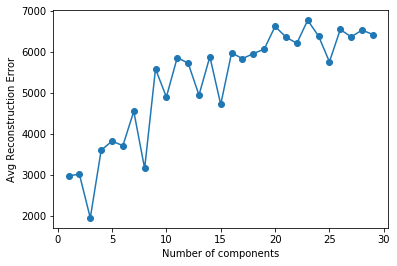

In [110]:
RandomisedProjection(X_HotEncoded)

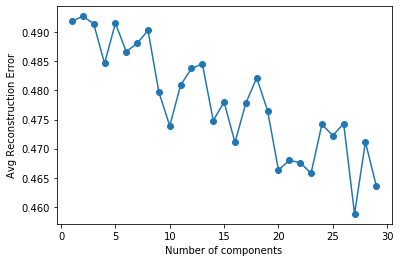

In [112]:
RandomisedProjection(dfMadelon_X_Scaled)